In [1]:
import random
import numpy as np

# Structure de données, affichage

In [2]:
# Représentation d'un pseudo-labyrinthe avec deux matrices de murs horizontaux et verticaux
class pseudoLabyrinthe:
    def __init__(self, n, m): # constructeur de la classe pseudolabyrinthe
        self.n = n
        self.m = m
        # Matrice de murs (True = mur, False = passage)
        self.murs_horizontaux = [[False for i in range(m)] for j in range(n-1)]
        self.murs_verticaux = [[False for i in range(n)] for j in range(m-1)]

    # Génère un pseudo-labyrinthe aléatoire
    def generer_aleatoire(self):
        for i in range(self.n - 1):
            for j in range(self.m):
                self.murs_horizontaux[i][j] = random.choice([True, False])
        for i in range(self.m - 1):
            for j in range(self.n):
                self.murs_verticaux[i][j] = random.choice([True, False])
    def enceinte(self):
        """
        affiche une cellule de taille M*N, avec la grille
        """
        k = line2d([(0,0), (self.m, 0), (self.m, self.n), (0, self.n), (0,0)], color="red", thickness=2, gridlines=True)
        return k
    def afficher(self):
        graphHorizontal = line2d([(0, 0), (0, 0)])
        graphVertical = line2d([(0, 0), (0, 0)])
        for i in range(len(self.murs_horizontaux)):
            for j in range(len(self.murs_horizontaux[i])):
                if (self.murs_horizontaux[i][j]):
                    graphHorizontal += line2d([(j, i+1), (j+1, i+1)], color="red", thickness=2) # j'ai échangé j et i
        for i in range(len(self.murs_verticaux)):
            for j in range(len(self.murs_verticaux[i])):
                if (self.murs_verticaux[i][j]):
                    graphVertical += line2d([(i+1, j), (i+1, j+1)], color="red", thickness=2)
        return graphHorizontal + graphVertical + self.enceinte()
    def nbmurscorr(self):
        l = np.random.permutation(np.array([0 for i in range(self.n*self.m-1)] 
                                           + [1 for i in range((2*self.n*self.m - self.n - self.m )-(self.n*self.m-1))]))
        t = np.split(l, (self.n*(self.m-1),))
        self.murs_horizontaux = list(np.split(t[1], self.n-1))
        self.murs_verticaux = list(np.split(t[0], self.m-1))
    def estconnexe(self):
        """
         La complexité de l’algorithme de recherhce pour la fonction estconnexe() est O(n * m), où n est le nombre de lignes et m le nombre de colonnes dans le labyrinthe. 
         Cela signifie que dans le pire des cas, l’algorithme visitera chaque cellule une fois.

         On explore chaque nœud (cellule) une fois et chaque arête (passage entre les cellules) une fois.
         Dans un labyrinthe, le nombre total de passages possibles est proportionnel au nombre de cellules, 
        donc l’algorithme doit vérifier chaque cellule et chaque passage adjacent pour s’assurer qu’il a exploré toutes les parties accessibles du labyrinthe.
         Même si certaines cellules sont visitées plus d’une fois à cause des retours en arrière, 
        chaque cellule est traitée une seule fois lorsqu’elle est visitée pour la première fois.
        """
        passage = [[False for i in range(self.m)] for j in range(self.n)]
        def recherche(i, j):
            """
            Algorithme de recherche inspiré d'un DFS
            """
            # Condition d'arrêt de notre boucle récursive
            if i < 0 or i >= self.n or j < 0 or j >= self.m or passage[i][j]:
                return
            passage[i][j] = True  # Marquer la cellule comme visitée
            # Parcourir les cellules adjacentes si il n'y a pas de mur
            if i > 0 and not self.murs_horizontaux[i-1][j]:
                recherche(i-1, j)
            if i < self.n - 1 and not self.murs_horizontaux[i][j]:
                recherche(i+1, j)
            if j > 0 and not self.murs_verticaux[j-1][i]:
                recherche(i, j-1)
            if j < self.m - 1 and not self.murs_verticaux[j][i]:
                recherche(i, j+1)

        recherche(0, 0)  # Commencer le parcours à partir de la cellule (0, 0)
        # Vérifier si toutes les cellules ont été visitées
        return all(all(row) for row in passage)

# test d'affichage et de création d'un labyrinthe

In [18]:
print(labyrinthe.estconnexe())

True


In [81]:
labyrinthe.murs_verticaux

[[False, True, False], [False, True, True]]

In [76]:
labyrinthe.estconnexe()

True

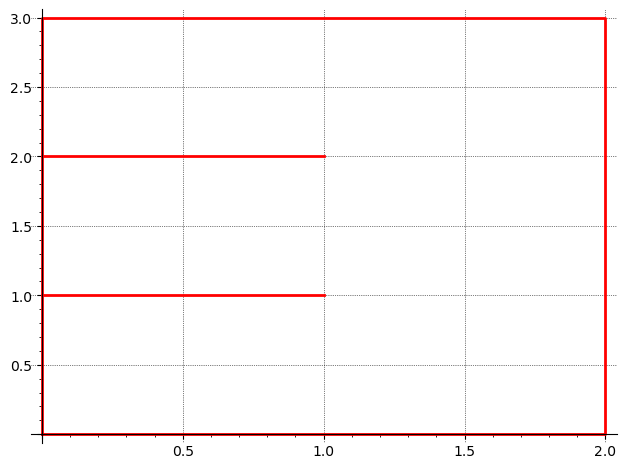

In [29]:
a = labyrinthe(3, 2)
a.genereraleatoirenaif()
a.afficher()